# **Data Science:: Healthcare - Persistency of a drug**
# **Problem Statement:**

One of the challenge for all Pharmaceutical companies is to understand the persistency of drug as per the physician prescription. To solve this problem ABC pharma company approached an analytics company to automate this process of identification.

**ML Problem:**

With an objective to gather insights on the factors that are impacting the persistency, build a classification for the given dataset.

**Target Variable:** Persistency_Flag

# **Task:**

Problem understanding

Data Understanding

Data Cleaning and Feature engineering

Model Development

Model Selection

Model Evaluation

Report the accuracy, precision and recall of both the class of target variable

Report ROC-AUC as well

Deploy the model

Explain the challenges and model selection





In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Read the Data
df = pd.read_excel("Healthcare_dataset.xlsx",sheet_name= "Dataset")

In [4]:
#Head
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


1. Total number of records

In [5]:
count = df.index
no_of_records = len(count)
print('Total number of records:',no_of_records)

print('\nThe details of the Dataframe are as :\n')
df.info()

Total number of records: 3424

The details of the Dataframe are as :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                        

2. Data types for all columns

In [6]:
df.dtypes

Ptid                              object
Persistency_Flag                  object
Gender                            object
Race                              object
Ethnicity                         object
                                   ...  
Risk_Hysterectomy_Oophorectomy    object
Risk_Estrogen_Deficiency          object
Risk_Immobilization               object
Risk_Recurring_Falls              object
Count_Of_Risks                     int64
Length: 69, dtype: object

3. Missing Values in the Dataset

In [7]:
df.isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Count_Of_Risks                    0
Length: 69, dtype: int64

4. Descriptive Statistics

In [8]:
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [9]:
(df == 0).sum()

Ptid                                0
Persistency_Flag                    0
Gender                              0
Race                                0
Ethnicity                           0
                                 ... 
Risk_Hysterectomy_Oophorectomy      0
Risk_Estrogen_Deficiency            0
Risk_Immobilization                 0
Risk_Recurring_Falls                0
Count_Of_Risks                    970
Length: 69, dtype: int64

Persistent and non-persistent count

In [10]:
#Based on the Persistency_Flag
x= df.groupby('Persistency_Flag').size()
print("The number of persistent patients is :", x[1])
print("The number of non-persisitent patients is :", x[0])

The number of persistent patients is : 1289
The number of non-persisitent patients is : 2135


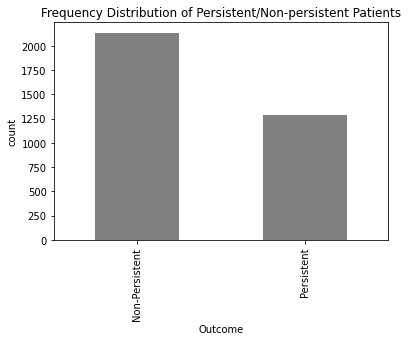

In [11]:
#Bar plot for the frequencies 
df['Persistency_Flag'].value_counts().plot(xlabel='Outcome', ylabel='count',color = 'Grey',kind ='bar', title = 'Frequency Distribution of Persistent/Non-persistent Patients')

The dataset consists of mainly the categorical data which can be converted to integer values. So lets do one hot encoding


In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df = df.apply(LabelEncoder().fit_transform)

Correlation among variables

In [13]:
df.corr()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
Ptid,1.000000,-0.022187,-0.095729,0.009430,-0.013669,-0.145919,0.073754,-0.029510,-0.019465,0.008538,...,0.013677,-0.045237,0.035540,0.053488,-0.032646,0.000342,-0.021834,0.019985,0.033214,0.034377
Persistency_Flag,-0.022187,1.000000,0.010343,-0.002052,0.001630,0.084415,-0.001976,-0.003143,0.139387,-0.112617,...,-0.003492,-0.009920,0.079782,-0.045277,-0.040138,-0.016106,-0.012155,-0.049787,-0.021345,0.082210
Gender,-0.095729,0.010343,1.000000,0.009530,0.029018,0.015179,0.076696,0.058281,0.010406,-0.019670,...,-0.021815,-0.027311,-0.032103,0.006158,0.001859,-0.031023,-0.013913,0.004093,0.036774,0.002931
Race,0.009430,-0.002052,0.009530,1.000000,-0.028989,-0.012944,-0.001512,-0.029418,-0.003044,-0.009140,...,0.020224,0.007740,-0.032665,-0.000236,0.002434,-0.001218,0.007310,0.008251,-0.007419,0.000259
Ethnicity,-0.013669,0.001630,0.029018,-0.028989,1.000000,-0.051424,0.001757,0.046276,-0.033124,0.055679,...,-0.013278,-0.021618,-0.006608,-0.041106,-0.025696,-0.008876,0.000494,0.000558,0.010095,-0.054873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Risk_Hysterectomy_Oophorectomy,0.000342,-0.016106,-0.031023,-0.001218,-0.008876,0.025917,-0.035448,0.004737,-0.001205,-0.031129,...,0.002712,-0.014107,0.024397,0.009903,0.015965,1.000000,-0.007186,0.028624,-0.001471,0.141469
Risk_Estrogen_Deficiency,-0.021834,-0.012155,-0.013913,0.007310,0.000494,-0.034017,-0.001795,0.020549,0.025867,-0.021976,...,-0.019399,-0.006327,-0.012976,-0.013837,-0.008020,-0.007186,1.000000,-0.003638,-0.008142,0.077153
Risk_Immobilization,0.019985,-0.049787,0.004093,0.008251,0.000558,-0.022612,0.032081,0.021763,-0.016451,0.003380,...,-0.021895,-0.007140,-0.024640,0.262889,-0.009052,0.028624,-0.003638,1.000000,0.023381,0.098860
Risk_Recurring_Falls,0.033214,-0.021345,0.036774,-0.007419,0.010095,-0.005100,0.055252,0.017813,0.023502,0.004214,...,0.025714,0.002901,0.020936,0.046352,0.084778,-0.001471,-0.008142,0.023381,1.000000,0.186956


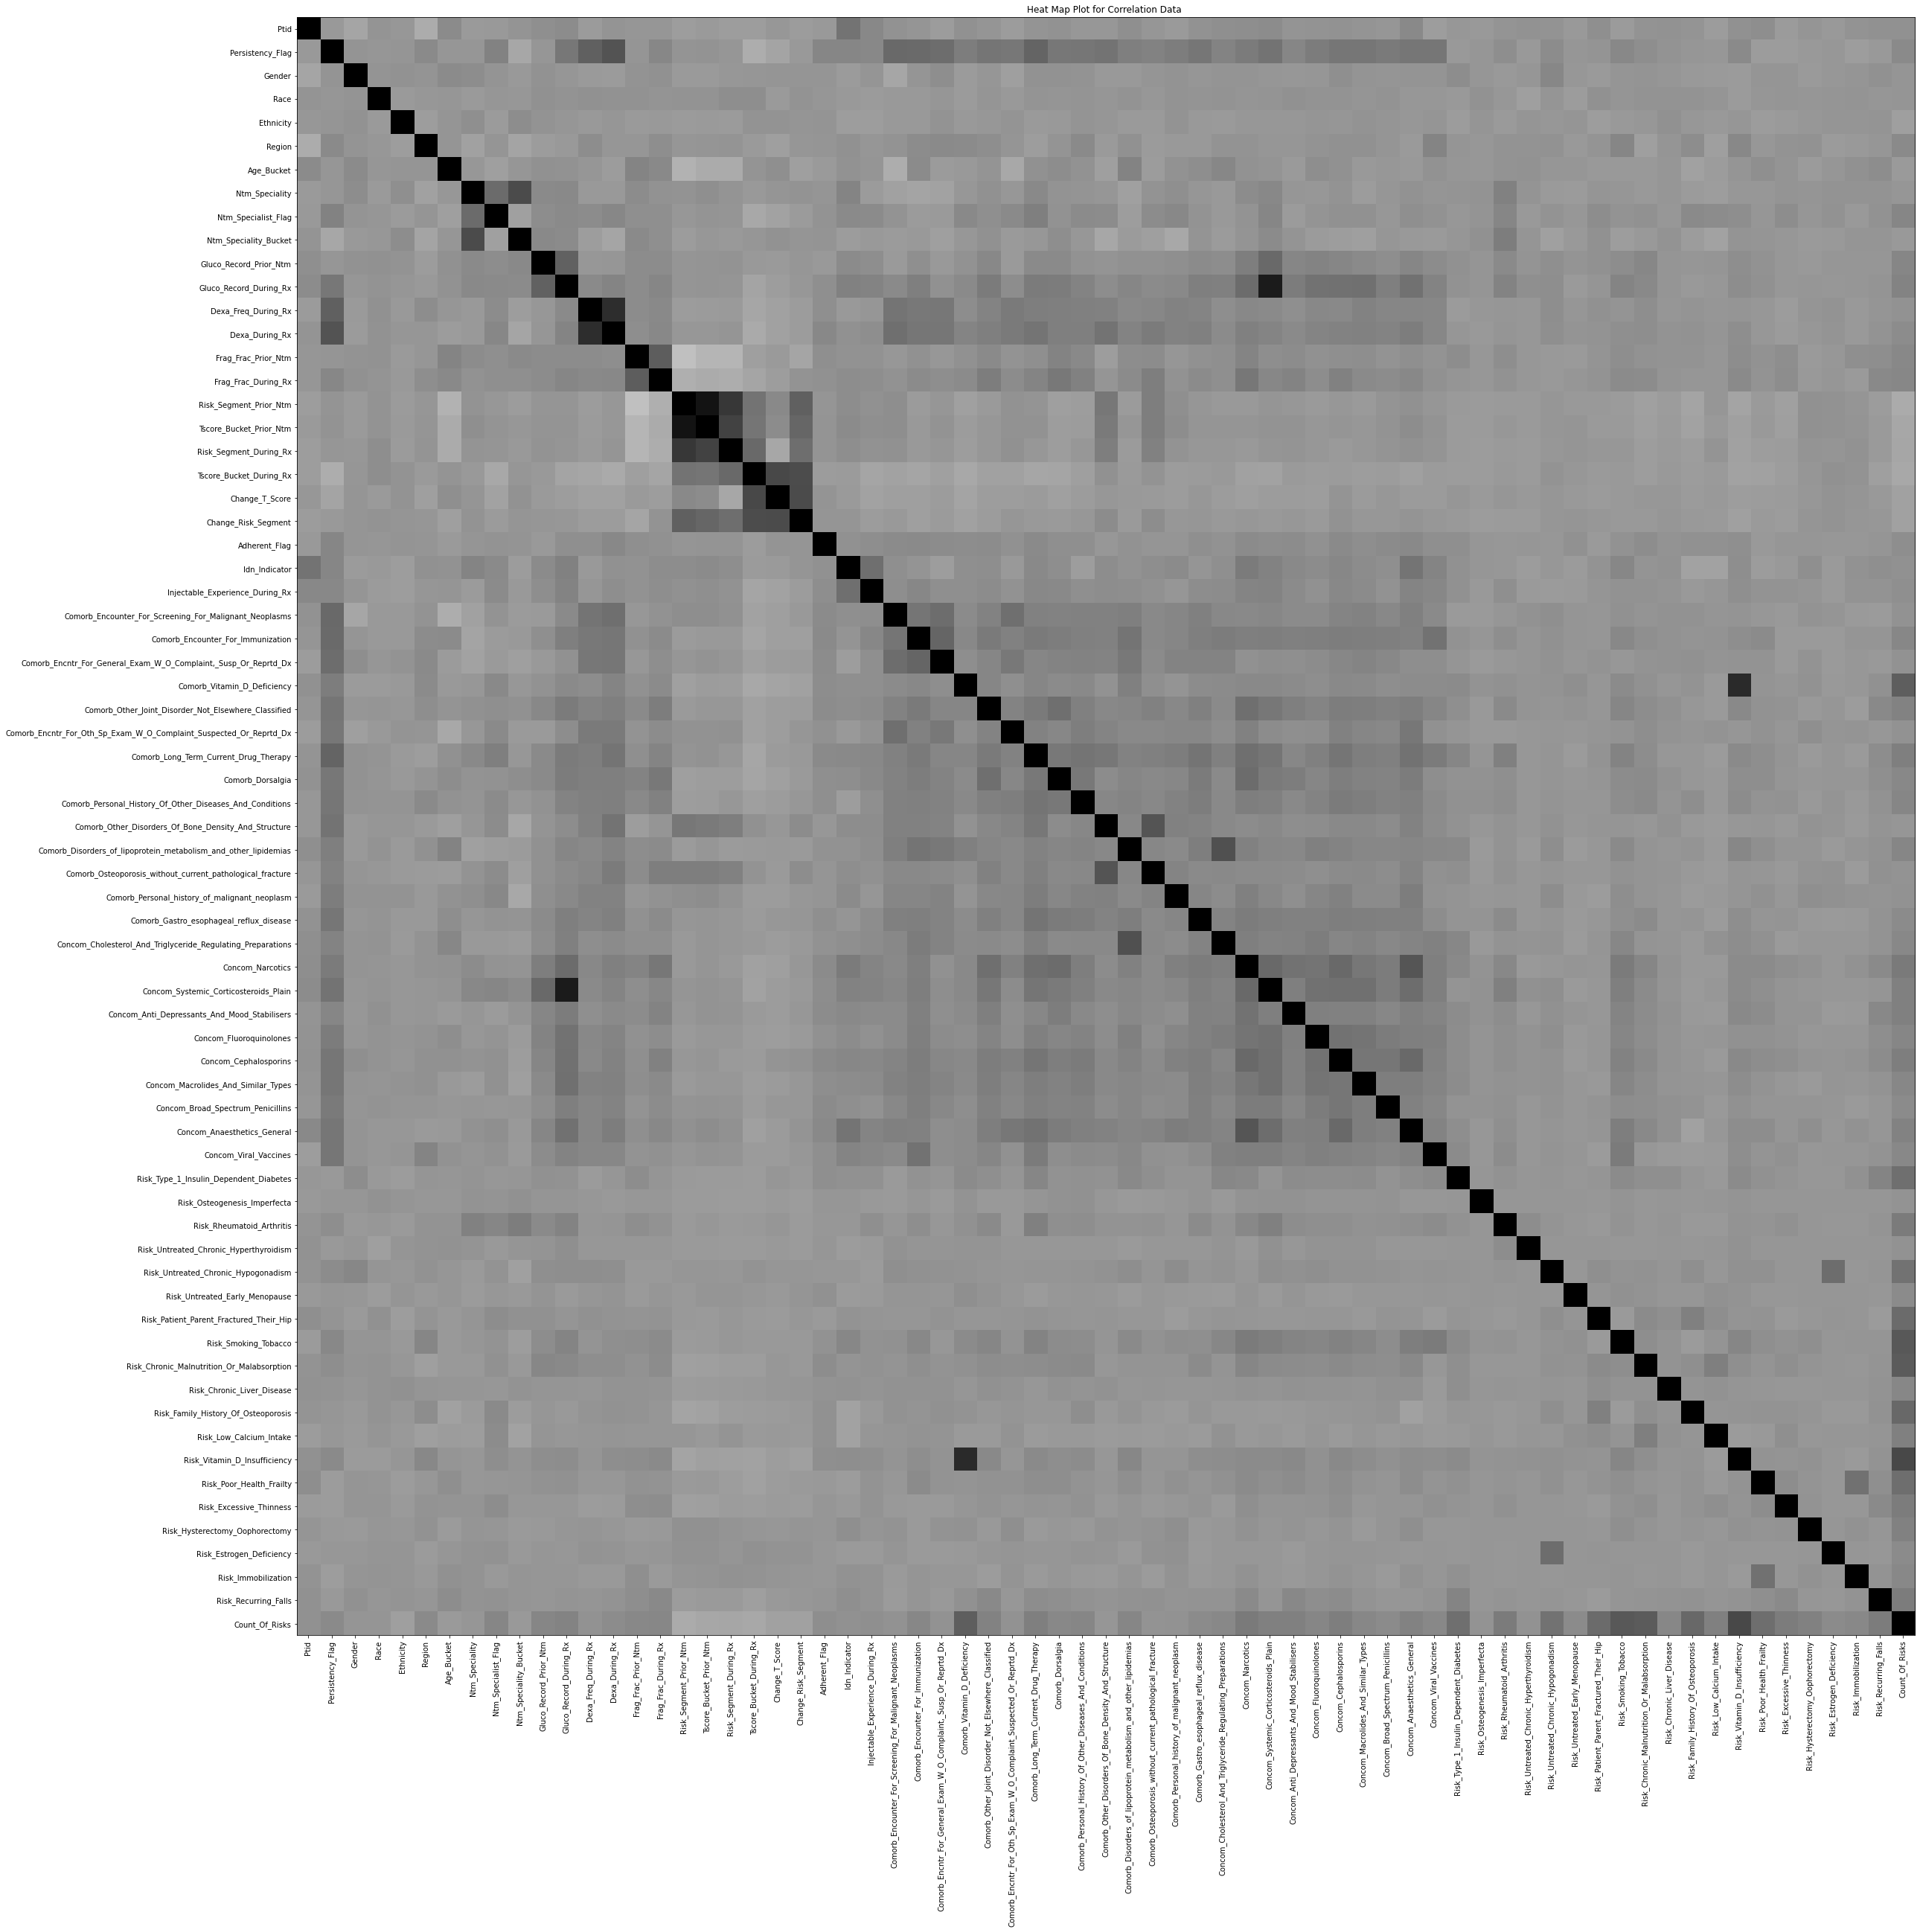

In [14]:
#Heatmap plot

fig, ax = plt.subplots(1,1 , figsize = (40,40))
im = ax.imshow(df.corr())
labels = df.corr().index
plt.xticks(range(0,len(df.corr().index)), df.corr(), rotation = 90)
plt.yticks(range(0,len(df.corr().columns)), df.corr().columns, rotation = 0)
plt.imshow(df.corr(), cmap='Greys', interpolation='nearest',vmax=1, vmin=-1, origin = 'upper')
plt.title('Heat Map Plot for Correlation Data ')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


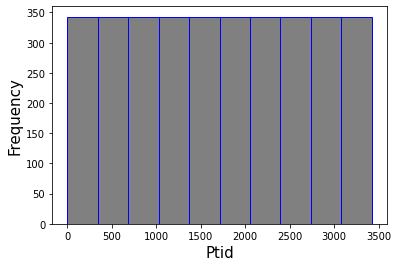

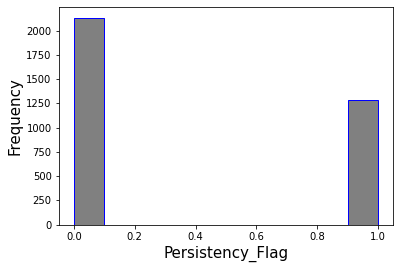

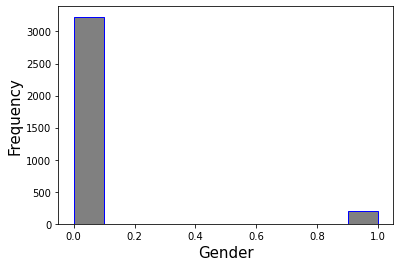

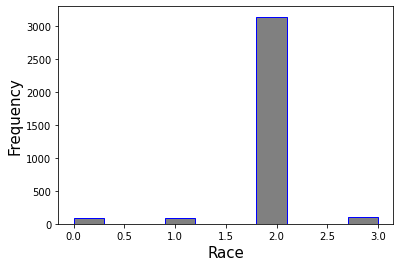

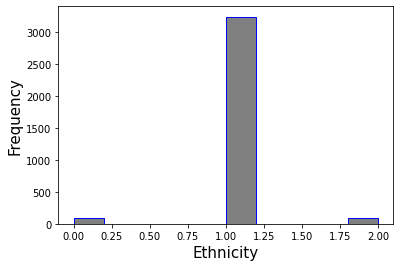

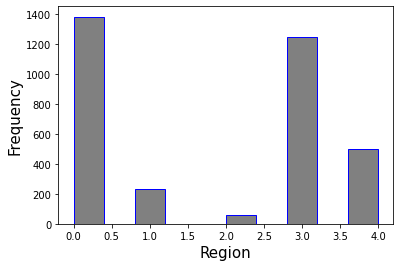

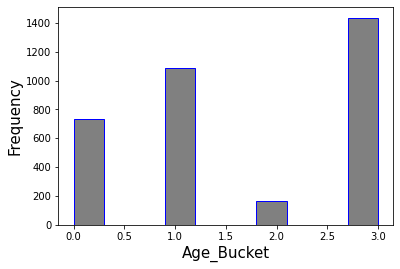

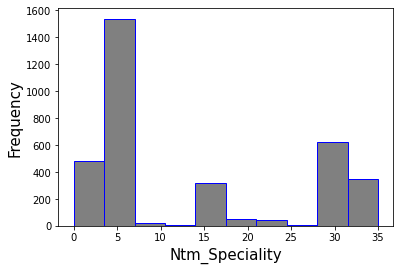

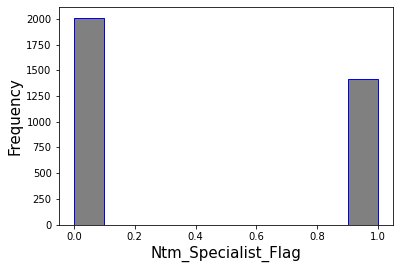

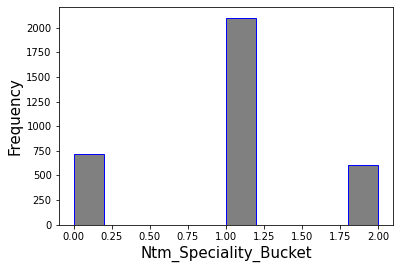

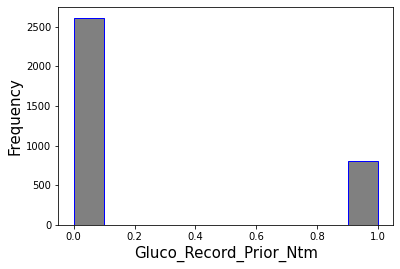

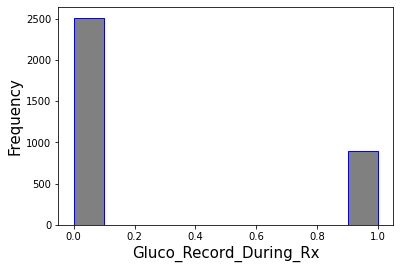

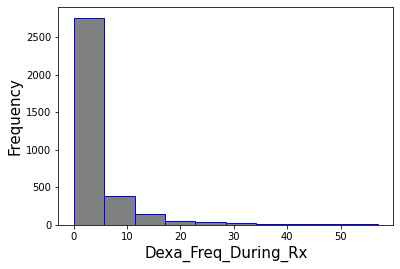

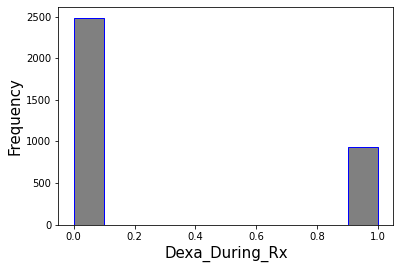

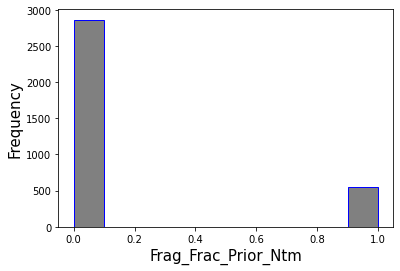

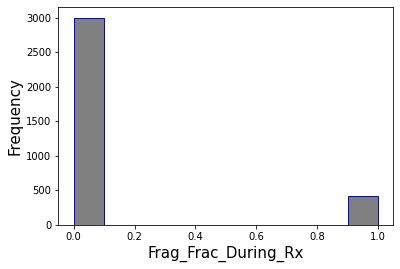

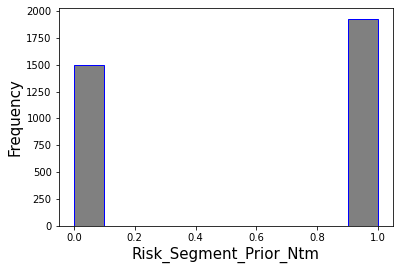

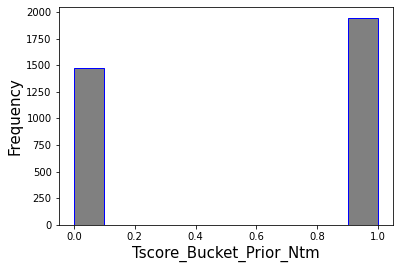

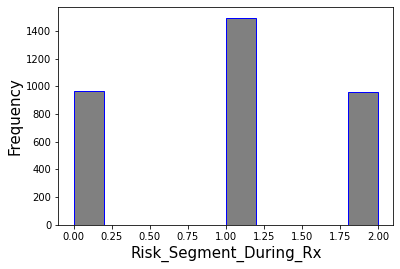

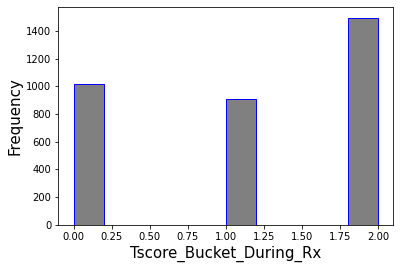

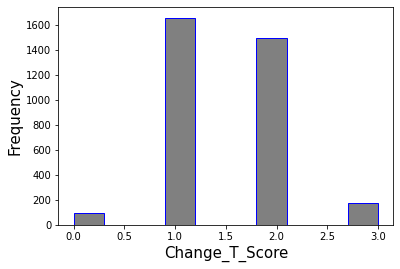

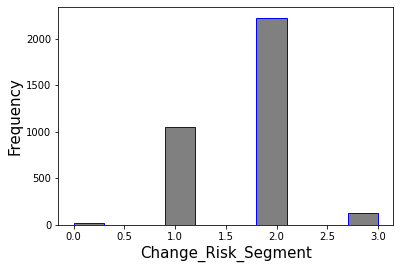

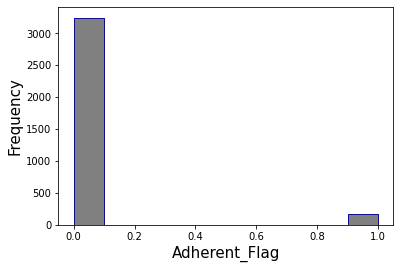

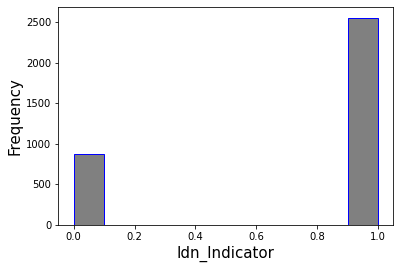

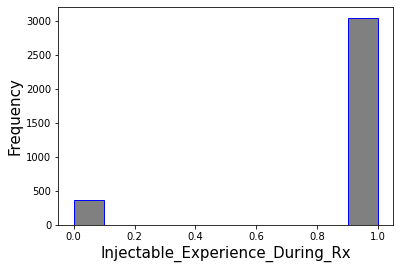

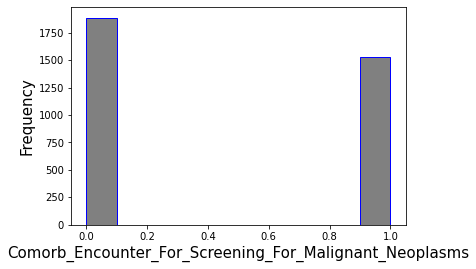

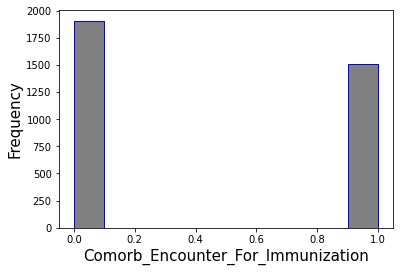

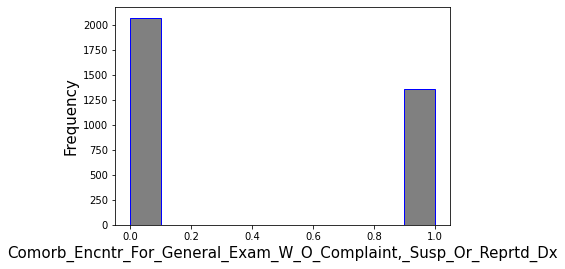

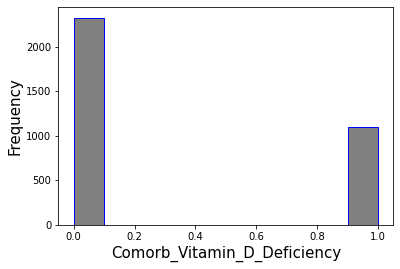

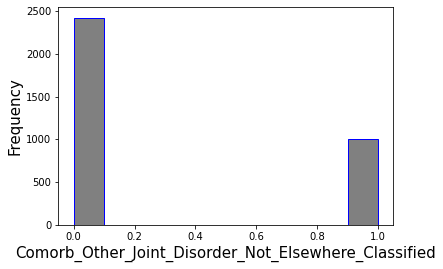

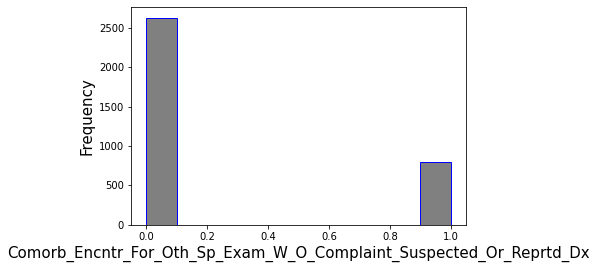

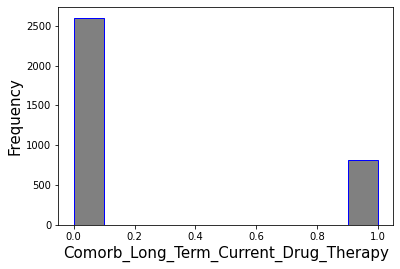

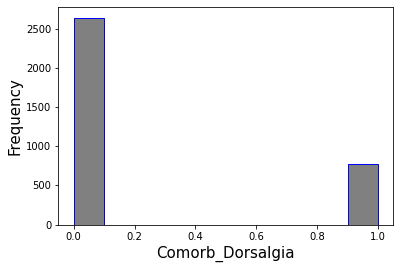

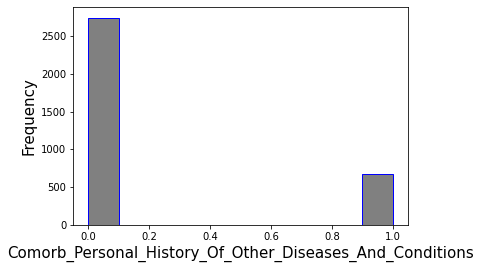

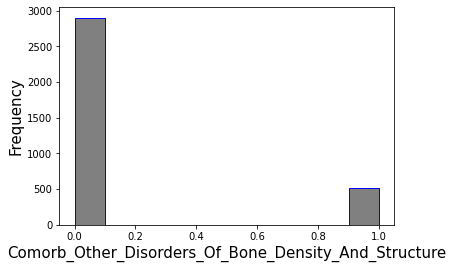

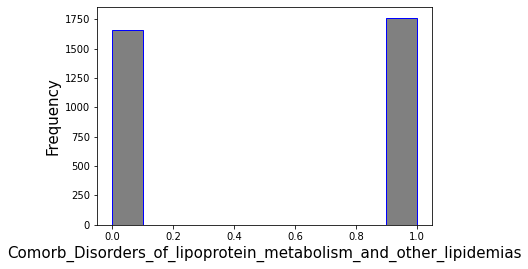

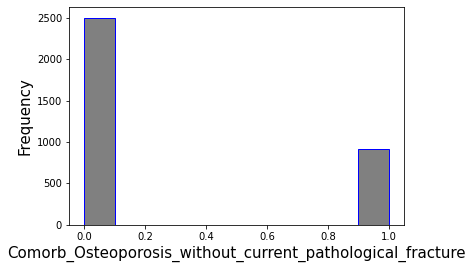

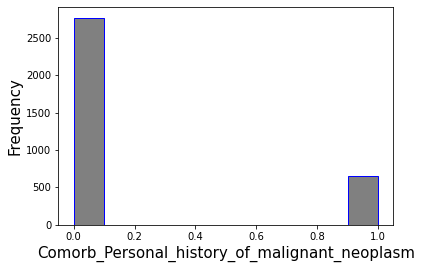

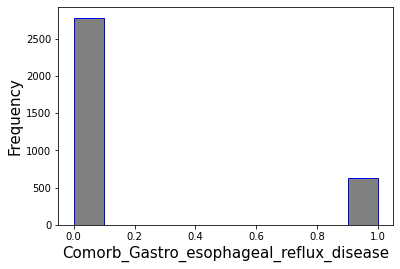

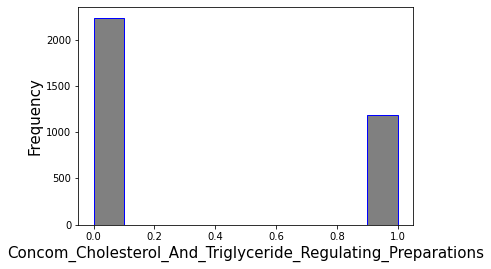

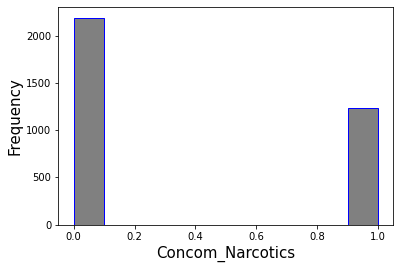

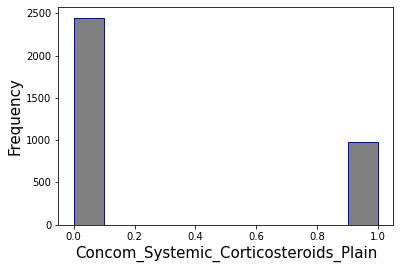

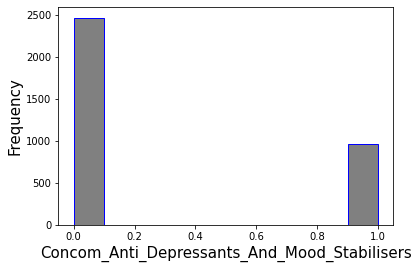

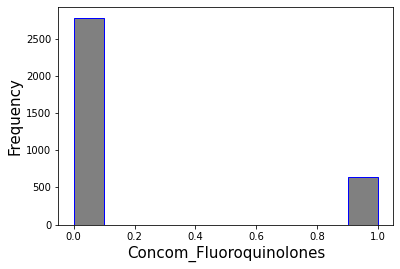

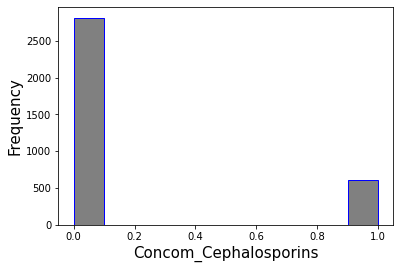

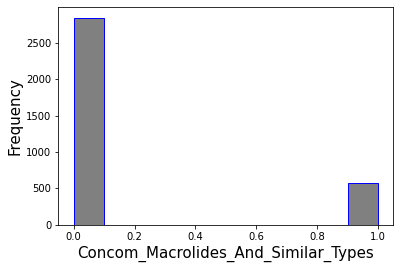

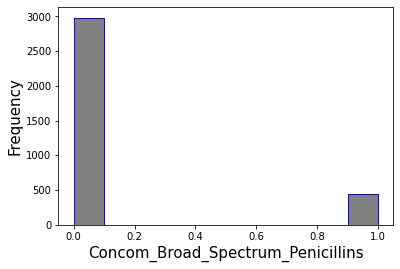

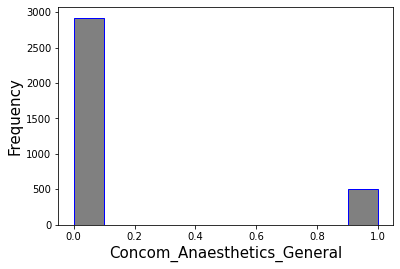

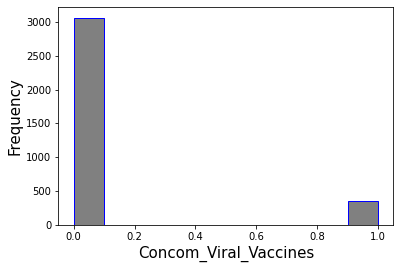

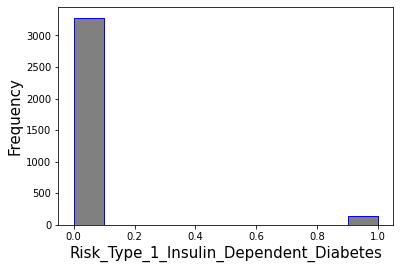

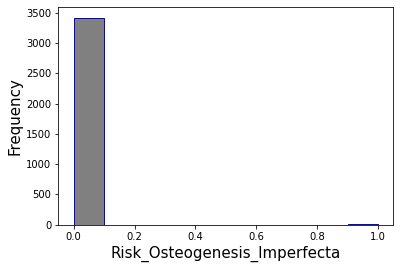

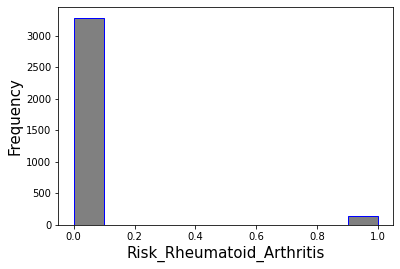

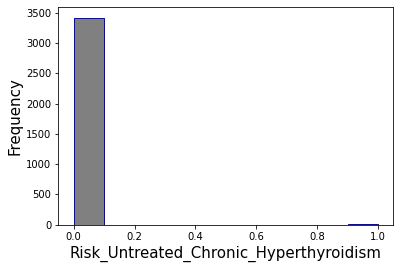

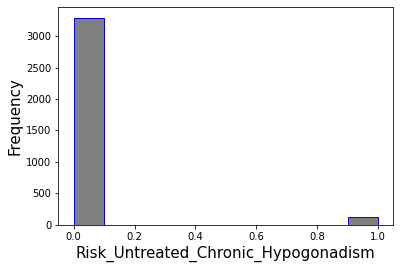

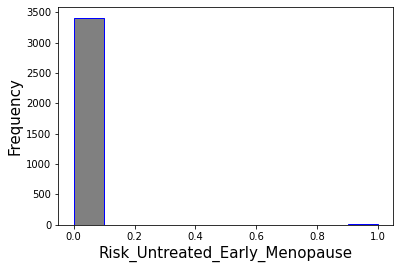

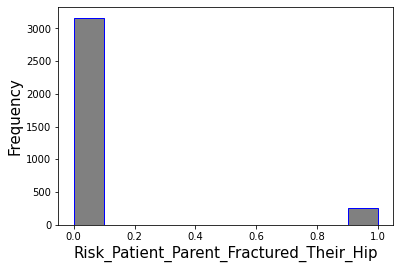

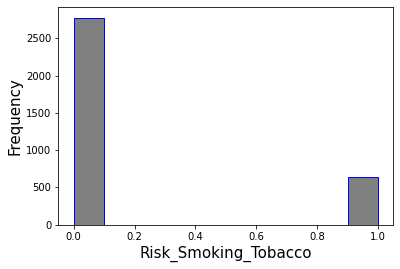

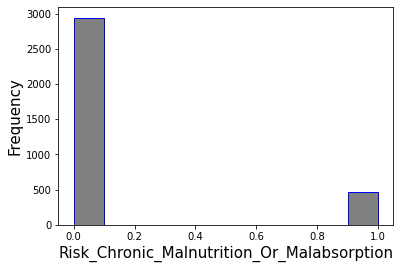

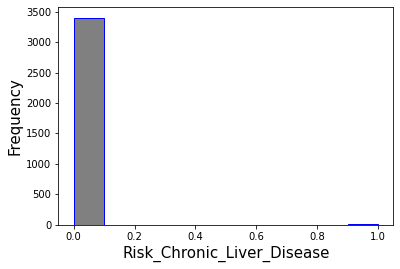

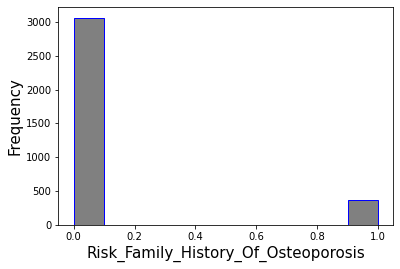

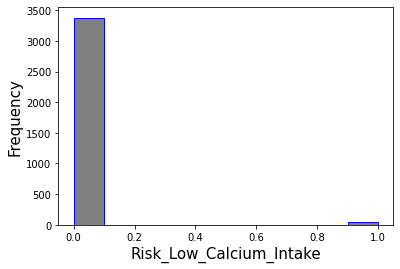

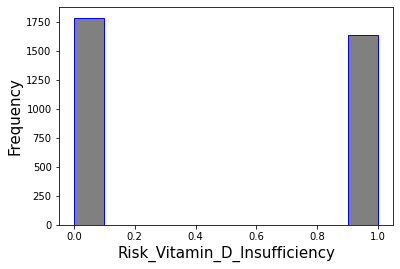

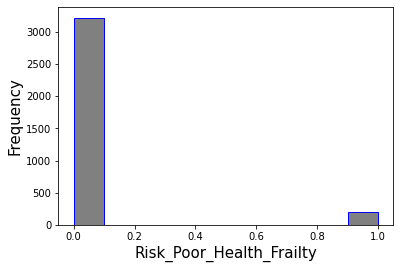

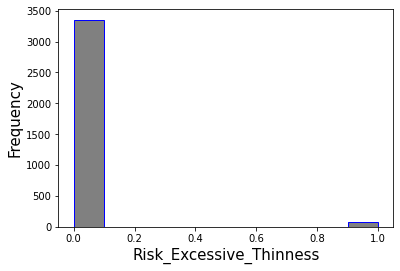

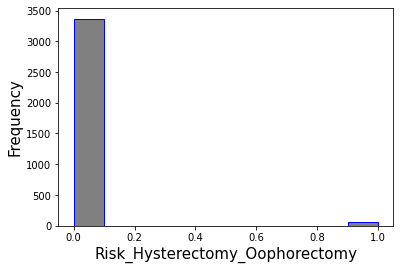

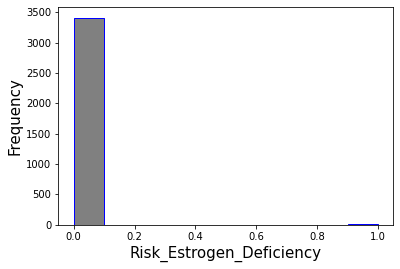

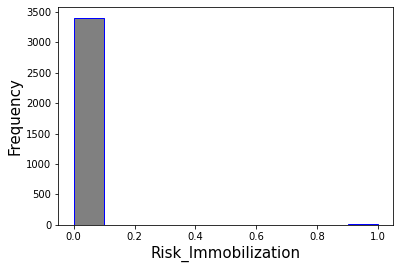

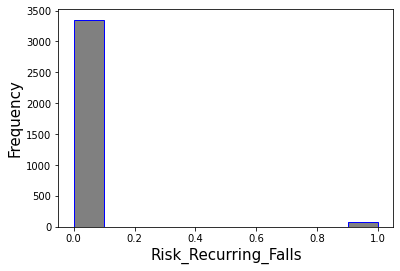

In [15]:
#plotting the histogram
for i, col in enumerate(df.columns[:-1]):
    plt.figure(i)
    plt.ylabel("Frequency", fontsize = 15)
    plt.xlabel(col, fontsize = 15)
    plt.hist(df[col], color= 'grey', edgecolor = 'b');

In [16]:
#plotting boxplot
properties = dict(markerfacecolor = 'red', marker = 'o', markeredgecolor = 'black')
#fig, ax = plt.subplots(70, int(((len(df.columns)-1))), figsize = (20, 20))
fig, ax = plt.subplots(35,2,figsize = (250, 250))
for i, ax in enumerate(ax.flat):
    ax.boxplot(df.iloc[:,i+1], flierprops =  properties)
    ax.set_title(df.columns[i+1], fontsize = 20, fontweight= 'bold')
    ax.tick_params(axis= 'y', labelsize = 14)
plt.tight_layout;
    

IndexError: ignored

In [17]:
QR1 = df.quantile(0.25)
QR3 = df.quantile(0.75)

IQR = QR3 - QR1
((df < (QR1 - 1.5 * IQR)) | (df > (QR3 + 1.5 * IQR))).any(axis=1)
    
#Print the IQR range 
print(IQR)

print('\n')
print("Outliers in the dataset : (True values in the below table)")
#The value where the "True" exist in below output is the outliers
(df < (QR1 - 1.5 * IQR)) | (df > (QR3 + 1.5 * IQR))


Ptid                              1711.5
Persistency_Flag                     1.0
Gender                               0.0
Race                                 0.0
Ethnicity                            0.0
                                   ...  
Risk_Hysterectomy_Oophorectomy       0.0
Risk_Estrogen_Deficiency             0.0
Risk_Immobilization                  0.0
Risk_Recurring_Falls                 0.0
Count_Of_Risks                       2.0
Length: 69, dtype: float64


Outliers in the dataset : (True values in the below table)


,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3420,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3421,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3422,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
#Remove the outliers( Datapoints outside 25% and 75% Quarters)
df = df[~((df < (QR1 - 1.5 * IQR)) | (df > (QR3 + 1.5 * IQR))).any(axis=1)]
df

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
11,223,0,0,2,1,0,3,5,0,1,...,0,0,0,0,0,0,0,0,0,0
16,778,0,0,2,1,0,3,5,0,1,...,0,0,0,0,0,0,0,0,0,0
25,1778,0,0,2,1,0,3,5,0,1,...,0,0,0,0,0,0,0,0,0,0
27,2000,0,0,2,1,0,3,5,0,1,...,0,0,0,0,0,0,0,0,0,0
36,2725,0,0,2,1,0,3,5,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,2465,0,0,2,1,3,0,34,0,1,...,0,0,1,0,0,0,0,0,0,1
3227,2477,0,0,2,1,3,3,5,0,1,...,0,0,0,0,0,0,0,0,0,0
3285,2541,0,0,2,1,4,2,34,0,1,...,0,0,0,0,0,0,0,0,0,0
3292,2549,0,0,2,1,3,1,5,0,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df.shape

(175, 69)

In [20]:
df.describe()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
count,175.000000,175.000000,175.0,175.0,175.0,175.000000,175.000000,175.000000,175.000000,175.0,...,175.0,175.0,175.000000,175.0,175.0,175.0,175.0,175.0,175.0,175.000000
mean,1824.577143,0.051429,0.0,2.0,1.0,1.320000,1.662857,8.274286,0.051429,1.0,...,0.0,0.0,0.348571,0.0,0.0,0.0,0.0,0.0,0.0,0.348571
std,1066.217756,0.221504,0.0,0.0,0.0,1.618996,1.234347,8.334540,0.221504,0.0,...,0.0,0.0,0.477885,0.0,0.0,0.0,0.0,0.0,0.0,0.477885
min,31.000000,0.000000,0.0,2.0,1.0,0.000000,0.000000,0.000000,0.000000,1.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,773.000000,0.000000,0.0,2.0,1.0,0.000000,1.000000,5.000000,0.000000,1.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,1901.000000,0.000000,0.0,2.0,1.0,0.000000,1.000000,5.000000,0.000000,1.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,2830.000000,0.000000,0.0,2.0,1.0,3.000000,3.000000,5.000000,0.000000,1.0,...,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
max,3402.000000,1.000000,0.0,2.0,1.0,4.000000,3.000000,34.000000,1.000000,1.0,...,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
